In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import norm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.lines as mlines
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from config import ORDER, JOURNAL_MAP

plt.rcParams["font.family"] = "Arial"
plt.rcParams['legend.title_fontsize'] = 7
plt.rcParams["text.usetex"] = True

df_sample = pd.read_csv("../data/focal_papers.csv")
df_generated = pd.read_csv("../data/generated_references.csv")
df_ground_truth = pd.read_csv("../data/ground_truth_references.csv")

# existing vs non-existent
df_existing = df_generated[df_generated["Exists"] == 1.0]
df_non_existent = df_generated[df_generated["Exists"] == 0.0]

/var/folders/kq/bwvwl1hd4g12lmk871x7q_br0000gn/T/ipykernel_32002/878453321.py:19: DtypeWarning: Columns (4,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df_generated = pd.read_csv("../data/generated_references.csv")


In [2]:
grouped_data = df_generated.groupby("id")
group_sizes = grouped_data.size()
existence_means = grouped_data.Exists.mean()

# Create DataFrame for overlapping points
overlap_df = pd.DataFrame({
    'size': group_sizes,
    'mean': existence_means
}).reset_index()

# Count overlapping points
point_counts = (
    overlap_df.groupby(['size', 'mean'])
    .size()
    .reset_index(name='count')
)

# Create color map
#colors = ['#BDD7E7', '#6BAED6', '#3182BD', '#08519C']  # Light to dark blue
colors = ['#FFFFFF', '#6BAED6', '#2171B5', '#08306B']
custom_cmap = LinearSegmentedColormap.from_list('custom_blues', colors)

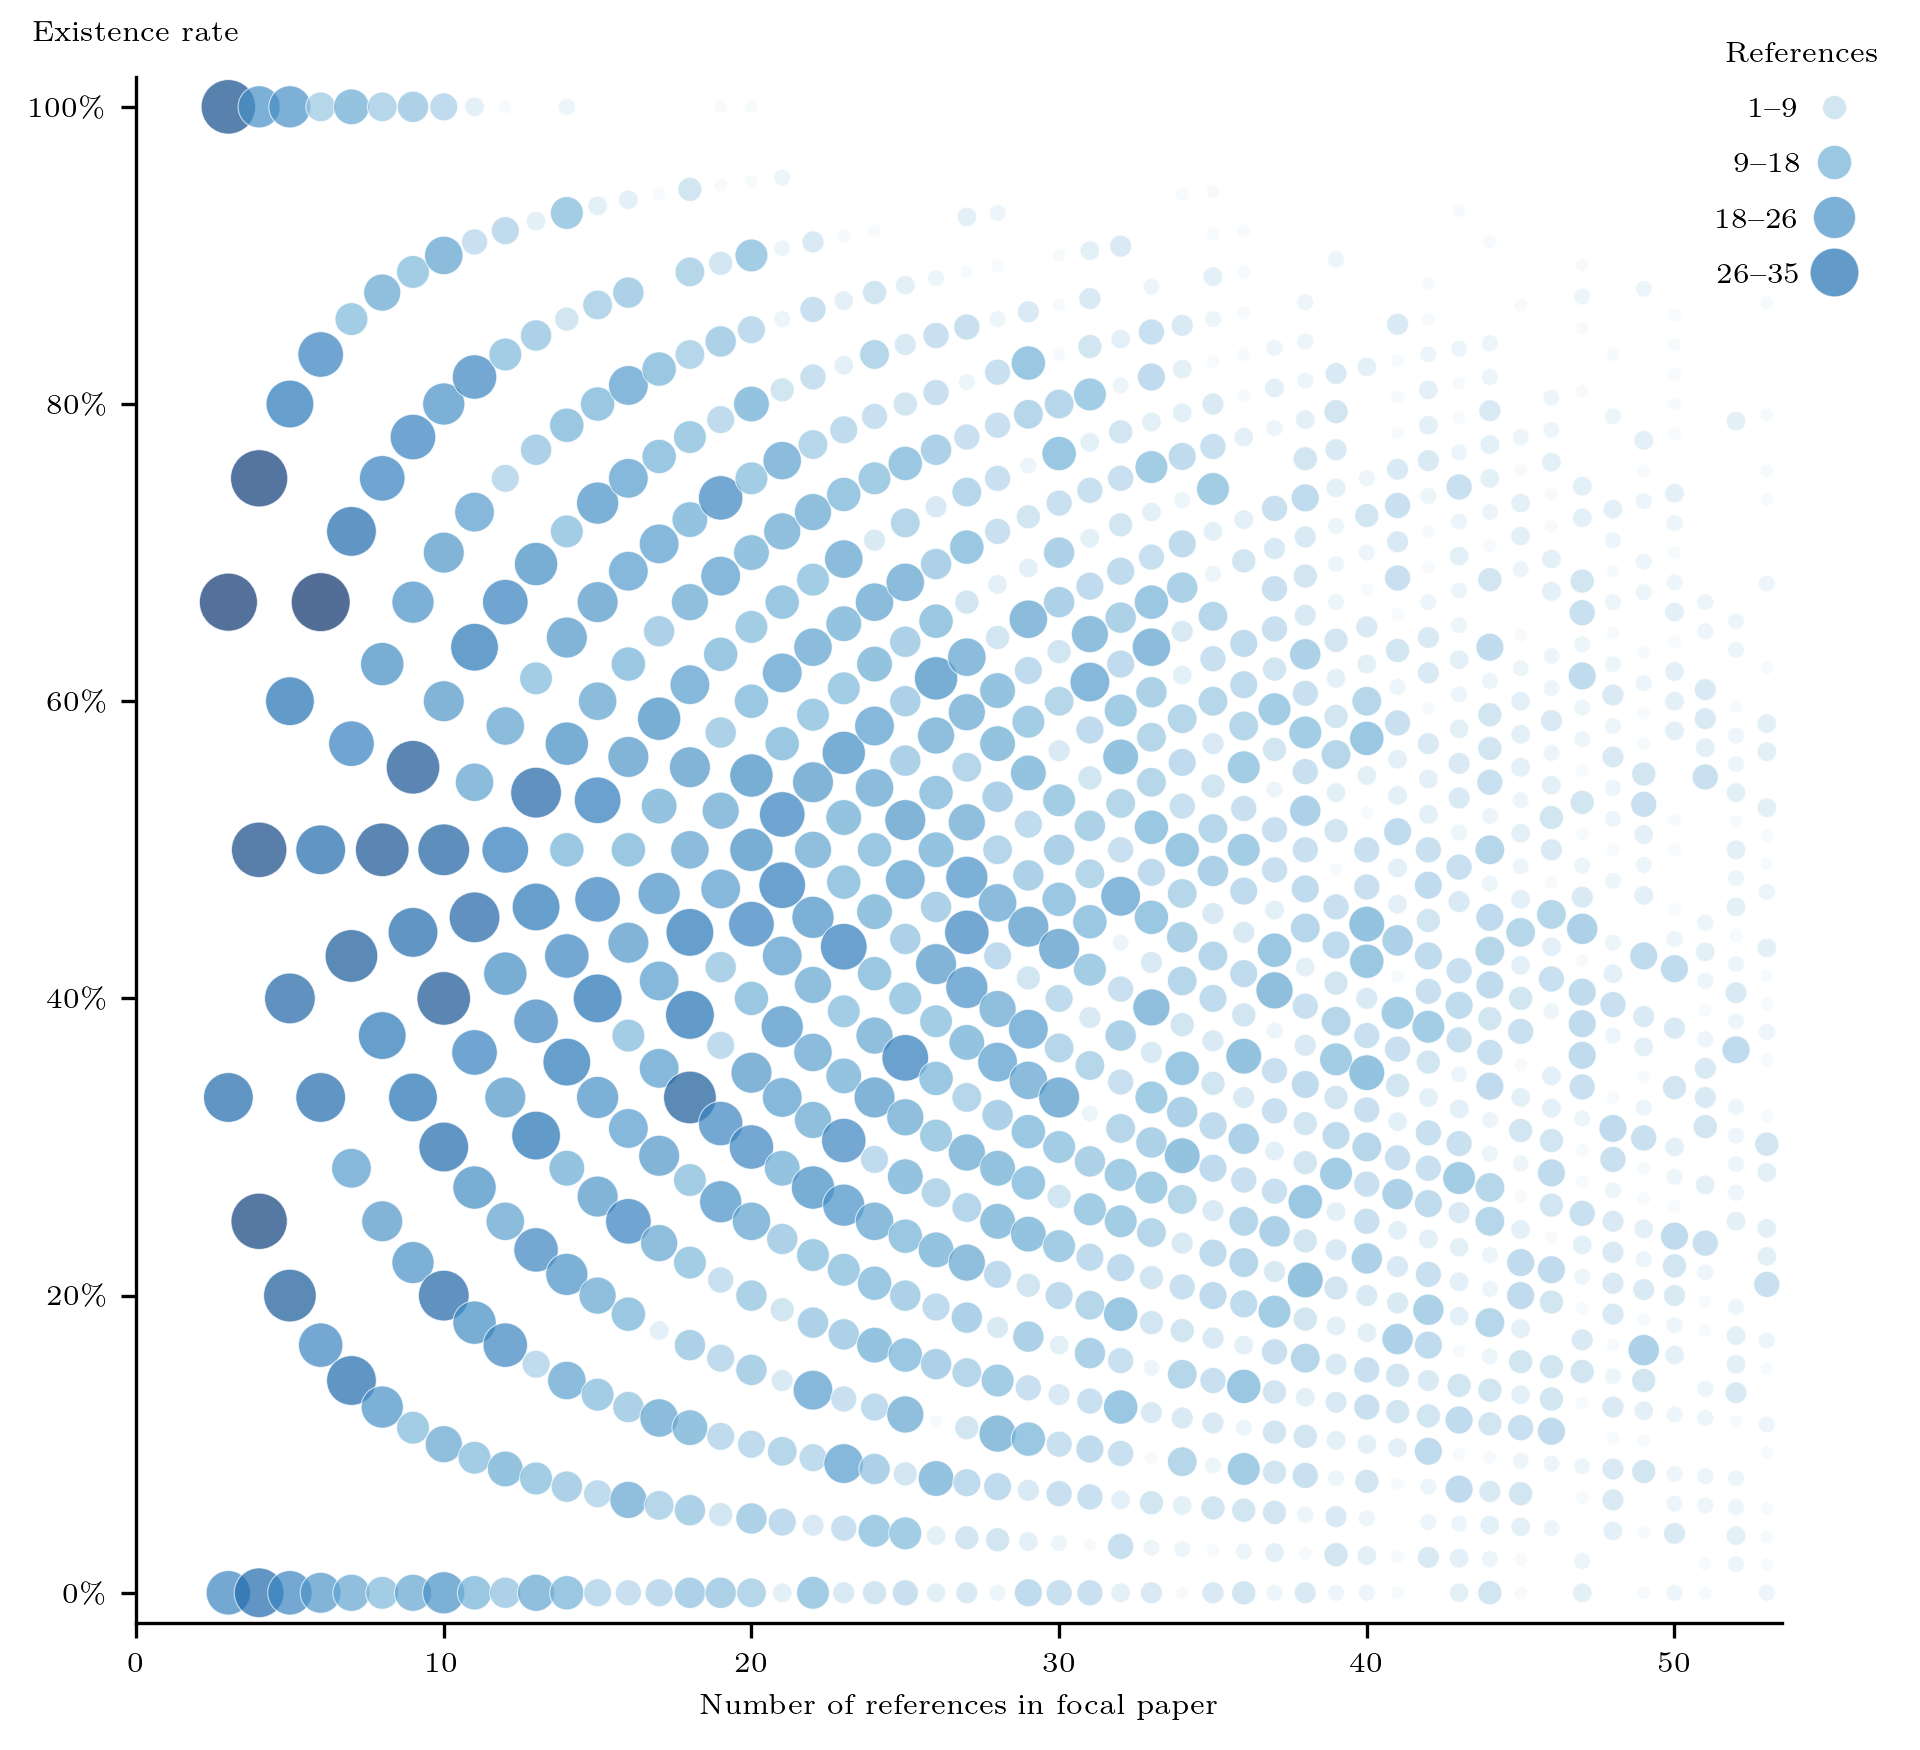

In [3]:
Figure2, ax2 = plt.subplot_mosaic(
    [
        ['A'],
    ],
    figsize=(7.08, 6.69),
    dpi=300,
    gridspec_kw={'wspace': 0.1, 'hspace': 0.25},
)

scatter = sns.scatterplot(
    data=point_counts,
    x='size',
    y='mean',
    size='count',  # Point size varies with count
    hue='count',   # Color varies with count
    sizes=(5, 200),  # Min and max point sizes
    palette=custom_cmap,  # Use our custom colormap
    alpha=0.7,
    legend='brief',  # This will show both size and color legends
    ax=ax2['A'],
)

# Create custom legend for count ranges
count_min = point_counts['count'].min()
count_max = point_counts['count'].max()
count_bins = np.linspace(count_min, count_max, 5)  # Create 4 bins
legend_labels = [
    f'{int(count_bins[i])}–{int(count_bins[i+1])}' 
    for i in range(len(count_bins)-1)
]

# Get legend handles correctly
handles, labels = ax2['A'].get_legend_handles_labels()

legend = ax2['A'].legend(
    handles[:len(legend_labels)],
    legend_labels,
    frameon=False,
    title='References',
    bbox_to_anchor=(0.95, 1.04), 
    loc='upper left',
    fontsize=7,  # Set font size of legend labels
    handletextpad=-5.0,  # Adjust to place labels on the left of handles (experiment with this value)
    labelspacing=1.0     # Adjust spacing between labels
)

# Calculate the longest label for alignment reference
max_width = max(text.get_window_extent().width for text in legend.get_texts())

# Adjust alignment for each label manually
for text in legend.get_texts():
    text.set_ha('right')  # Set horizontal alignment to 'right'
    text.set_position((max_width - text.get_window_extent().width, text.get_position()[1]))

# Labels
ax2['A'].set_xlabel('Number of references in focal paper', fontsize=7)
ax2['A'].set_ylabel('Existence rate', fontsize=7, rotation=0)
ax2['A'].yaxis.set_label_coords(0., 1.02)

# Customize ticks
ax2['A'].set_ylim(-0.02, 1.02)
ax2['A'].set_xlim(0, 53.5)
ax2['A'].set_xticks([0, 10, 20, 30, 40, 50])
ax2['A'].set_xticklabels([0, 10, 20, 30, 40, 50], fontsize=7)
ax2['A'].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax2['A'].set_yticklabels([r"0$\%$", r"20$\%$", r"40$\%$", r"60$\%$", r"80$\%$", r"100$\%$"], fontsize=7)

# Remove top and right spines
sns.despine(ax=ax2['A'], left=False, bottom=False)